## Guided Project: Creating a Kaggle Workflow

In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
holdout=pd.read_csv('test.csv')


In [2]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing the Data

In [4]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [5]:
def preprocess(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    for c in ["Age_categories", "Fare_categories","Title", "Cabin_type", "Sex"]:
        df = create_dummies(df, c)
    return df
    

In [6]:
train = preprocess(train)
holdout = preprocess(holdout)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


## Exploring the Data

In [8]:
train[['SibSp','Parch', 'Survived']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SibSp     891 non-null    int64
 1   Parch     891 non-null    int64
 2   Survived  891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


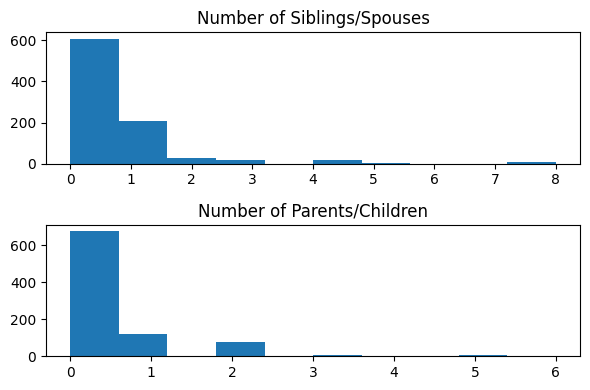

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(2,1)
axs[0].hist(train['SibSp'], )
axs[1].hist(train['Parch'], )
axs[0].set_title('Number of Siblings/Spouses')
axs[1].set_title('Number of Parents/Children')
fig.tight_layout()
plt.show()


In [10]:
SibSp = train.pivot_table(values='Survived', index = 'SibSp')
SibSp

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
Parch = train.pivot_table(values='Survived', index = 'Parch')
Parch

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


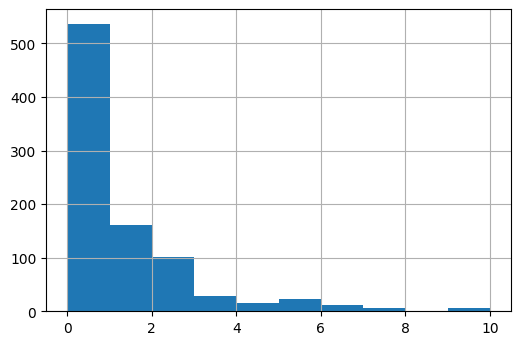

In [12]:
SibSp_Parch = train['SibSp']+train['Parch']
SibSp_Parch.hist()

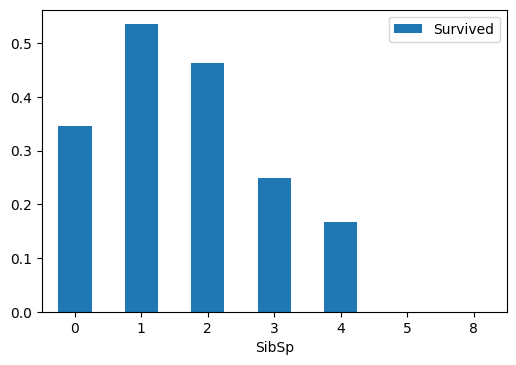

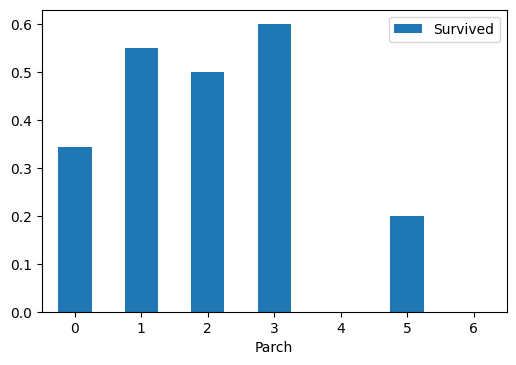

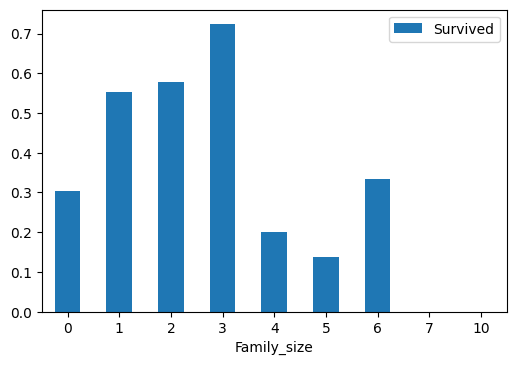

In [13]:
families = train[['SibSp', 'Parch', 'Survived']].copy()
families['Family_size']=SibSp_Parch
for i in families.columns.drop('Survived'):
    pivot = families.pivot_table(values = 'Survived', index = i)
    pivot.plot.bar(rot = 0)
    plt.show()

The SibSp column shows the number of siblings and/or spouses each passenger had on board, while the Parch columns shows the number of parents or children each passenger had onboard. Neither column has any missing values.

The distribution of values in both columns is skewed right, with the majority of values being zero.

You can sum these two columns to explore the total number of family members each passenger had onboard. The shape of the distribution of values in this case is similar, however there are less values at zero, and the quantity tapers off less rapidly as the values increase.

Looking at the survival rates of the the combined family members, you can see that few of the over 500 passengers with no family members survived, while greater numbers of passengers with family members survived.

## Engineering New Features

Given that only 30% of passengers traveling alone survived, let's create a binary column containing (1) if the passanger was alone and 0 - if not.

In [14]:
def create_alone(df):
    family_size = df['SibSp']+df['Parch']
    df['isalone']=family_size.map(lambda i: 0 if i>0 else 1)
    return df

In [15]:
train = create_alone(train)
train[['SibSp', 'Parch', 'isalone']].head(3)

,SibSp,Parch,isalone
0,1,0,0
1,1,0,0
2,0,0,1


In [16]:
holdout = create_alone(holdout)
holdout[['SibSp', 'Parch', 'isalone']].head(3)

,SibSp,Parch,isalone
0,0,0,1
1,1,0,0
2,0,0,1


## Selecting the Best-Performing Features

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    df = df.dropna(axis = 1)
    df = df.select_dtypes([np.number])
    all_X = df.drop(['PassengerId', 'Survived'], axis = 1)
    all_y = df['Survived']
    clf = RandomForestClassifier(random_state =1)
    estimator = RFECV(clf, cv = 10)
    estimator.fit(all_X, all_y)
    best_columns = list(all_X.columns[estimator.support_])
    print(best_columns)
    return best_columns

In [18]:
best_cols = select_features(train)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child', 'Age_categories_Teenager', 'Age_categories_Young Adult', 'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12', 'Fare_categories_12-50', 'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


## Selecting and Tuning Different Algorithms

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
def select_model(df, features):
        all_X = df[features]
        all_y = df['Survived']
        log_reg = {'model':'LogisticRegression',
                   'estimator': LogisticRegression(),
                   'hyperparams': {"solver": ["newton-cg", "lbfgs", "liblinear"]}}
        k_neighbors = {'model':'KNeighborsClassifier',
                   'estimator': KNeighborsClassifier(),
                   'hyperparams': {"n_neighbors": range(1,20,2),
                                   "weights": ["distance", "uniform"],
                                   "algorithm": ["ball_tree", "kd_tree", "brute"],
                                   "p": [1,2]}}
        forest = {'model':'RandomForestClassifier',
                   'estimator': RandomForestClassifier(),
                   'hyperparams':{"n_estimators": [4, 6, 9],
                                  "criterion": ["entropy", "gini"],
                                  "max_depth": [2, 5, 10],
                                  "max_features": ["log2", "sqrt"],
                                  "min_samples_leaf": [1, 5, 8],
                                  "min_samples_split": [2, 3, 5]}}
        list_dicts = [log_reg, k_neighbors, forest]
        
        for i in list_dicts:
            print('Model Name:',i['model'])
            clf = GridSearchCV(estimator=i['estimator'],
                               param_grid = i['hyperparams'],
                               cv = 10)
            clf.fit(all_X, all_y)
            i['best_params_']=clf.best_params_
            i['best_score_']=clf.best_score_
            i['best_estimator_']=clf.best_estimator_
            print('Best parameters: {0};\n Best Score:{1}'
                  .format(i['best_params_'], i['best_score_']))
        return list_dicts

In [21]:
models_performance = select_model(train, best_cols)

Model Name: LogisticRegression


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/dataquest/s

Best parameters: {'solver': 'lbfgs'};
 Best Score:0.8204744069912608
Model Name: KNeighborsClassifier
Best parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'};
 Best Score:0.7767041198501874
Model Name: RandomForestClassifier
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6};
 Best Score:0.8417977528089888


## Making a Submission to Kaggle

In [26]:
def save_submission_file(model, cols, file_name = 'prediction_results.csv'):
    predictions = model.predict(holdout[cols])
    df = pd.DataFrame({'PassengerID':holdout['PassengerId'],
                                    'Survived': predictions})
    df.to_csv(file_name, index = False)

In [23]:
models_performance

[{'model': 'LogisticRegression',
  'estimator': LogisticRegression(),
  'hyperparams': {'solver': ['newton-cg', 'lbfgs', 'liblinear']},
  'best_params_': {'solver': 'lbfgs'},
  'best_score_': 0.8204744069912608,
  'best_estimator_': LogisticRegression()},
 {'model': 'KNeighborsClassifier',
  'estimator': KNeighborsClassifier(),
  'hyperparams': {'n_neighbors': range(1, 20, 2),
   'weights': ['distance', 'uniform'],
   'algorithm': ['ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2]},
  'best_params_': {'algorithm': 'brute',
   'n_neighbors': 5,
   'p': 1,
   'weights': 'uniform'},
  'best_score_': 0.7767041198501874,
  'best_estimator_': KNeighborsClassifier(algorithm='brute', p=1)},
 {'model': 'RandomForestClassifier',
  'estimator': RandomForestClassifier(),
  'hyperparams': {'n_estimators': [4, 6, 9],
   'criterion': ['entropy', 'gini'],
   'max_depth': [2, 5, 10],
   'max_features': ['log2', 'sqrt'],
   'min_samples_leaf': [1, 5, 8],
   'min_samples_split': [2, 3, 5]},
  'best_params

In [27]:
model = models_performance[2]['best_estimator_']
save_submission_file(model,best_cols)